In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load dataset
df = pd.read_csv("/content/spam.csv")  # Replace with actual filename


In [ ]:
df

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y
...,...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31,n
4597,14,0.000,0.353,0.00,0.00,0.00,n
4598,118,0.000,0.000,0.00,0.00,0.30,n
4599,78,0.000,0.000,0.00,0.00,0.96,n


In [ ]:
#df = df[df['crl.tot'] < 3000]

array([[<Axes: title={'center': 'crl.tot'}>,
        <Axes: title={'center': 'dollar'}>],
       [<Axes: title={'center': 'bang'}>,
        <Axes: title={'center': 'money'}>],
       [<Axes: title={'center': 'n000'}>,
        <Axes: title={'center': 'make'}>]], dtype=object)

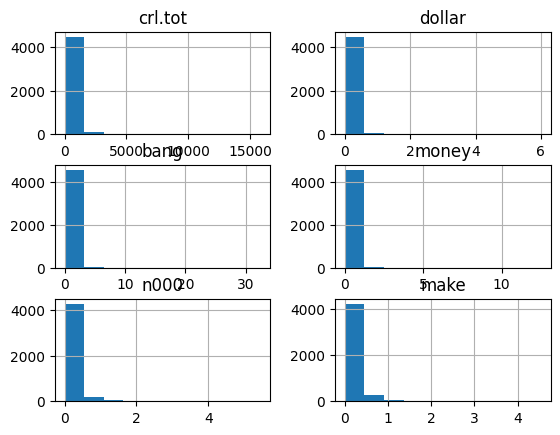

In [ ]:
df.hist()

In [ ]:
df.describe()

,crl.tot,dollar,bang,money,n000,make
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,283.289285,0.075811,0.269071,0.094269,0.101645,0.104553
std,606.347851,0.245882,0.815672,0.442636,0.350286,0.305358
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,266.000000,0.052000,0.315000,0.000000,0.000000,0.000000
max,15841.000000,6.003000,32.478000,12.500000,5.450000,4.540000


In [ ]:
def remove_outliers_iqr(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]

# Columns to check for outliers
columns = ['crl.tot', 'dollar', 'bang', 'money', 'n000', 'make']

# Remove outliers
df_clean = remove_outliers_iqr(df, columns)
df=df_clean
# Print the shape before and after outlier removal
print("Original shape:", df.shape)
print("New shape after outlier removal:", df_clean.shape)


Original shape: (2607, 7)
New shape after outlier removal: (2607, 7)


array([[<Axes: title={'center': 'crl.tot'}>,
        <Axes: title={'center': 'dollar'}>],
       [<Axes: title={'center': 'bang'}>,
        <Axes: title={'center': 'money'}>],
       [<Axes: title={'center': 'n000'}>,
        <Axes: title={'center': 'make'}>]], dtype=object)

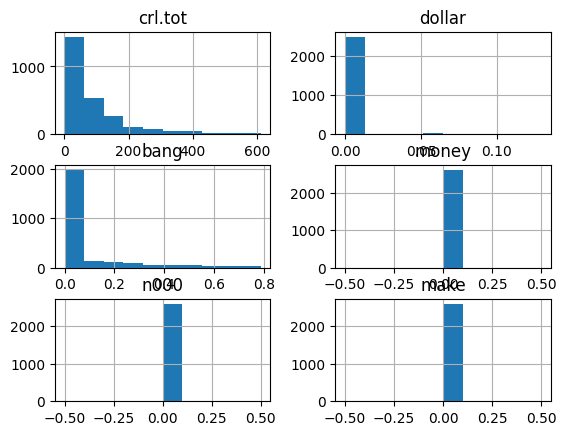

In [ ]:
df.hist()

In [ ]:
df.describe()

,crl.tot,dollar,bang,money,n000,make
count,2607.000000,2607.000000,2607.000000,2607.0,2607.0,2607.0
mean,92.283468,0.003081,0.082845,0.0,0.0,0.0
std,112.238087,0.015606,0.170461,0.0,0.0,0.0
min,1.000000,0.000000,0.000000,0.0,0.0,0.0
25%,18.000000,0.000000,0.000000,0.0,0.0,0.0
50%,51.000000,0.000000,0.000000,0.0,0.0,0.0
75%,119.000000,0.000000,0.071000,0.0,0.0,0.0
max,611.000000,0.129000,0.787000,0.0,0.0,0.0


In [ ]:
df=pd.get_dummies(df,drop_first=True,dtype=int)

In [ ]:
df

,crl.tot,dollar,bang,money,n000,make,yesno_y
0,278,0.000,0.778,0.0,0.0,0.0,1
3,191,0.000,0.137,0.0,0.0,0.0,1
4,191,0.000,0.135,0.0,0.0,0.0,1
5,54,0.000,0.000,0.0,0.0,0.0,1
6,112,0.054,0.164,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...
4592,27,0.000,0.000,0.0,0.0,0.0,0
4594,19,0.000,0.000,0.0,0.0,0.0,0
4595,24,0.000,0.000,0.0,0.0,0.0,0
4597,14,0.000,0.353,0.0,0.0,0.0,0


In [ ]:
X = df.drop(columns=['yesno_y'])

y = df['yesno_y']


# Split dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

model = sm.Logit(y_train, X_train).fit()


print(model.summary())

Optimization terminated successfully.
         Current function value: 0.641950
         Iterations 6


LinAlgError: Singular matrix

In [ ]:
X = df.drop(columns=['yesno_y'])
y = df['yesno_y']
X = sm.add_constant(X)

# Split dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8467432950191571
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       430
           1       0.71      0.22      0.33        92

    accuracy                           0.85       522
   macro avg       0.78      0.60      0.62       522
weighted avg       0.83      0.85      0.81       522



In [ ]:


X = df.drop(columns=['yesno_y'])
y = df['yesno_y']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Drop highly correlated features
corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
X_train = X_train.drop(columns=to_drop, errors='ignore')
X_test = X_test.drop(columns=to_drop, errors='ignore')

# Add small noise to avoid singularity
X_train += np.random.normal(0, 1e-10, X_train.shape)

# Add constant (intercept) term
X_train = sm.add_constant(X_train, has_constant='add')
X_test = sm.add_constant(X_test, has_constant='add')

# Fit Logistic Regression Model
try:
    model = sm.Logit(y_train, X_train).fit()
    print(model.summary())
except np.linalg.LinAlgError:
    print("Singular Matrix: Try removing correlated or constant features.")

         Current function value: 0.371364
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                yesno_y   No. Observations:                 2085
Model:                          Logit   Df Residuals:                     2078
Method:                           MLE   Df Model:                            6
Date:                Thu, 13 Mar 2025   Pseudo R-squ.:                  0.1765
Time:                        01:08:07   Log-Likelihood:                -774.29
converged:                      False   LL-Null:                       -940.22
Covariance Type:            nonrobust   LLR p-value:                 1.205e-68
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6883      0.104    -25.786      0.000      -2.893      -2.484
crl.tot        0.0044      0.000      8.765      0.000       0.00

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
(np.exp(model.params)-1)*100

,0
const,-9.320042e+01
crl.tot,4.367075e-01
dollar,6.718077e+09
bang,6.593917e+03
money,2.401395e+01
n000,2.012613e+01
make,1.658482e+01


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred =np.where(y_pred>0.5,1,0)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       424
           1       0.79      0.28      0.41        98

    accuracy                           0.85       522
   macro avg       0.82      0.63      0.66       522
weighted avg       0.84      0.85      0.82       522



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd


vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]


print(vif_data[vif_data["VIF"] > 10])

Empty DataFrame
Columns: [Feature, VIF]
Index: []
